In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from helpers import scaling,scaling_reverse, RSquaredSeparated
import h5py
from matplotlib import pyplot as plt
from tensorflow.keras.utils import Progbar


2024-07-09 14:41:59.894749: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-09 14:42:00.160608: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-09 14:42:00.675063: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-09 14:42:01.692427: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
dataset = "run3_dataset_10000_test.h5"
input_df = pd.read_hdf(dataset,key="input")
output_df = pd.read_hdf(dataset,key="output")


In [4]:
for i in range(115):
    print(input_df.columns[i], input_df.columns[i+115])

ARS01_DBPM_0760_X ARS01_DBPM_0760_Y
ARS01_DBPM_1080_X ARS01_DBPM_1080_Y
ARS01_DBPM_1460_X ARS01_DBPM_1460_Y
ARS01_DBPM_1900_X ARS01_DBPM_1900_Y
ARS01_DBPM_2410_X ARS01_DBPM_2410_Y
ARS01_DBPM_2910_X ARS01_DBPM_2910_Y
ARS01_DBPM_4220_X ARS01_DBPM_4220_Y
ARS01_DBPM_4720_X ARS01_DBPM_4720_Y
ARS01_DBPM_5250_X ARS01_DBPM_5250_Y
ARS01_DBPM_5880_X ARS01_DBPM_5880_Y
ARS02_DBPM_1080_X ARS02_DBPM_1080_Y
ARS02_DBPM_1460_X ARS02_DBPM_1460_Y
ARS02_DBPM_1900_X ARS02_DBPM_1900_Y
ARS02_DBPM_2410_X ARS02_DBPM_2410_Y
ARS02_DBPM_2910_X ARS02_DBPM_2910_Y
ARS02_DBPM_4220_X ARS02_DBPM_4220_Y
ARS02_DBPM_4720_X ARS02_DBPM_4720_Y
ARS02_DBPM_5250_X ARS02_DBPM_5250_Y
ARS02_DBPM_5880_X ARS02_DBPM_5880_Y
ARS03_DBPM_0810_X ARS03_DBPM_0810_Y
ARS03_DBPM_1080_X ARS03_DBPM_1080_Y
ARS03_DBPM_1460_X ARS03_DBPM_1460_Y
ARS03_DBPM_1900_X ARS03_DBPM_1900_Y
ARS03_DBPM_2410_X ARS03_DBPM_2410_Y
ARS03_DBPM_2910_X ARS03_DBPM_2910_Y
ARS03_DBPM_4220_X ARS03_DBPM_4220_Y
ARS03_DBPM_4720_X ARS03_DBPM_4720_Y
ARS03_DBPM_5250_X ARS03_DBPM

In [5]:
input_df.head()

ARS01_DBPM_0760_X  ARS01_DBPM_1080_X  ARS01_DBPM_1460_X  \
221           -0.546829          -0.156270           0.072100   
7693          -0.451926          -0.056627           0.110686   
8952          -0.644923          -0.158573           0.094584   
3662          -0.557040          -0.171334           0.064673   
8593          -0.598743          -0.198813           0.057061   

      ARS01_DBPM_1900_X  ARS01_DBPM_2410_X  ARS01_DBPM_2910_X  \
221            0.341886          -0.512406           0.668353   
7693           0.291316          -0.490912           0.685585   
8952           0.386379          -0.619877           0.804661   
3662           0.346034          -0.507022           0.655392   
8593           0.365506          -0.526110           0.668558   

      ARS01_DBPM_4220_X  ARS01_DBPM_4720_X  ARS01_DBPM_5250_X  \
221           -0.600898           0.513508          -0.214899   
7693          -0.653669           0.588086          -0.297804   
8952          -0.751115           0.636169          -0.292992   
3662          -0.581434           0.493279          -0.196612   
8593          -0.585754           0.488735          -0.183760   

      ARS01_DBPM_5880_X  ...  ARS12_DBPM_1080_Y  ARS12_DBPM_1460_Y  \
221            0.050106  ...           0.090532           0.265221   
7693           0.156848  ...           0.078212           0.246131   
8952           0.088001  ...           0.064766           0.248464   
3662           0.031562  ...           0.095161           0.269186   
8593           0.008085  ...           0.084963           0.257759   

      ARS12_DBPM_1900_Y  ARS12_DBPM_2410_Y  ARS12_DBPM_2910_Y  \
221            0.272789           0.288359           0.171183   
7693           0.260854           0.282907           0.175803   
8952           0.274394           0.306253           0.194488   
3662           0.273527           0.286074           0.167432   
8593           0.268941           0.287359           0.173449   

      ARS12_DBPM_4220_Y  ARS12_DBPM_4720_Y  ARS12_DBPM_5250_Y  \
221           -0.014746          -0.131000          -0.175798   
7693          -0.003915          -0.122848          -0.173267   
8952          -0.003906          -0.142185          -0.207554   
3662          -0.017060          -0.129964          -0.171457   
8593          -0.010831          -0.128240          -0.175980   

      ARS12_DBPM_5880_Y  ARS01_DBPM_0390_Y  
221           -0.055354           0.295803  
7693          -0.061123           0.272585  
8952          -0.090611           0.264810  
3662          -0.050061           0.300513  
8593          -0.060428           0.275779  

[5 rows x 230 columns]

In [6]:
output_df.head()

ARS01_MCOX_0740  ARS01_MCOX_1090  ARS01_MCOX_1470  ARS01_MCOX_1910  \
221         -0.312519        -0.242236         0.328337         0.051800   
7693        -0.311446        -0.239240         0.331372         0.051657   
8952        -0.311143        -0.238225         0.330905         0.051642   
3662        -0.311787        -0.240175         0.330644         0.051679   
8593        -0.310986        -0.238456         0.331360         0.051648   

      ARS01_MCOX_2420  ARS01_MCOX_2920  ARS01_MCOX_4230  ARS01_MCOX_4730  \
221          0.438325         0.431851         0.434457         0.434370   
7693         0.438253         0.431778         0.434385         0.434296   
8952         0.438211         0.431736         0.434343         0.434253   
3662         0.438253         0.431778         0.434384         0.434295   
8593         0.438241         0.431765         0.434369         0.434278   

      ARS01_MCOX_5260  ARS01_MCOX_5890  ...  ARS12_MCOY_1110  ARS12_MCOY_1490  \
221          0.170410         0.352321  ...        -0.614665        -0.326920   
7693         0.170321         0.355848  ...        -0.609494        -0.327232   
8952         0.170497         0.354434  ...        -0.631967        -0.330002   
3662         0.170538         0.353589  ...        -0.604532        -0.327516   
8593         0.169490         0.350949  ...        -0.611130        -0.327778   

      ARS12_MCOY_1930  ARS12_MCOY_2430  ARS12_MCOY_2930  ARS12_MCOY_4240  \
221          0.037826        -0.444931        -0.489554        -0.486590   
7693         0.037843        -0.444933        -0.489553        -0.486589   
8952         0.037994        -0.444942        -0.489551        -0.486588   
3662         0.037859        -0.444933        -0.489553        -0.486589   
8593         0.037874        -0.444935        -0.489554        -0.486589   

      ARS12_MCOY_4740  ARS12_MCOY_5270  ARS12_MCOY_5900  ARS01_MCOY_0400  
221         -0.226255        -0.328291         0.006523        -0.132251  
7693        -0.226254        -0.328517         0.004239        -0.132736  
8952        -0.226253        -0.324142         0.013969        -0.132568  
3662        -0.226254        -0.328866         0.007895        -0.130807  
8593        -0.226254        -0.322287         0.011346        -0.132536  

[5 rows x 230 columns]

In [7]:
input_main =  input_df.values
output = output_df.values

In [8]:
#path = "/home/guney/PycharmProjects/Summerproject/out/out/2024-06-17-213649/"
path = "/home/guney/PycharmProjects/Summerproject/out/out/2024-06-18-160112/" # best so far
#path = ("/home/guney/PycharmProjects/Summerproject/out/out/2024-06-24-135051/")
#path = ("/home/guney/PycharmProjects/Summerproject/out/out/2024-07-03-193857/")


In [9]:

# Path to your HDF5 file
file_path = path + "Limits_scale.h5"
orbit_min =None
orbit_max = None
corr_min = None
corr_max = None
# Open the HDF5 file in read mode
with h5py.File(file_path, 'r') as hdf:
    orbit_min = np.array(hdf['orbit_min'])
    orbit_max = np.array(hdf['orbit_max'])
    corr_min = np.array(hdf['corr_min'])
    corr_max = np.array(hdf['corr_max'])
    
print(orbit_min.mean(), orbit_max.mean(),corr_max.mean(),corr_min.mean())

-0.2576144994919263 0.27968792393896313 -0.03135473106389157 -0.03779608008410241


In [10]:
input = scaling(input_main,orbit_min,orbit_max,0,1)


In [11]:
#normalization = tf.keras.layers.Normalization()
#normalization.adapt(input1.values)
#input1 = normalization(input1)
print(input.shape)

(10100, 230)


In [12]:
model = tf.keras.models.load_model(path+"my_model_try.keras")
model.summary()

2024-07-09 14:42:10.965809: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-09 14:42:10.966450: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "crazy_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ autoencoder (Autoencoder)       │ ?                      │        70,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ ?                      │        61,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,500 (513.67 KB)

 Trainable params: 129,940 (507.58 KB)

 Non-trainable params: 1,560 (6.09 KB)

In [13]:
reconstruction, inference =model.predict(input)
inference = scaling_reverse(inference,corr_min,corr_max,0,1)

316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step


In [14]:
np.mean((reconstruction-input)**2)


0.0004135686789881859

In [15]:
np.mean(np.abs((reconstruction-input)))/np.mean(np.abs(input))*100
#3.407694220513701 213649 2 2 30
#3.20516602215316 151249 
#2.7935828293172973 160112 2 2 30 less reg more ext dropout
#2.814409512424136 112956 (no l2/dropout) 2 30 2
#3.1261610868358094 223206 long training similar tp 160112 

2.7935828293172973

In [23]:
np.mean((inference-output)**2)


2.459129511886306e-06

In [24]:
np.mean(np.abs((inference-output)))/np.mean(np.abs(output))*100
#0.1855639169785394 213619 2 2 30
#0.18558382136962667 151245 2 2 3
#0.16947492783613283 #
#0.17538639681951318 112956 (no l2/dropout) 2 30 2
#0.17632081263832514 223206


0.16947492783613283

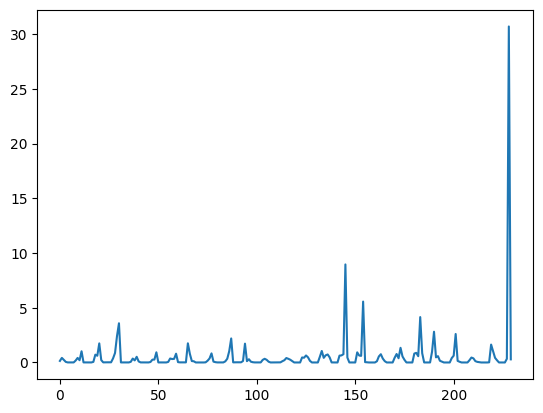

In [25]:
np.mean(np.abs((inference-output)),axis=0)/np.mean(np.abs(output),axis=0)*100
plt.figure()
plt.plot(np.mean(np.abs((inference-output)),axis=0)/np.mean(np.abs(output),axis=0)*100)
plt.show()

2024-07-08 15:50:34.694629: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18584000 exceeds 10% of free system memory.
2024-07-08 15:50:34.701125: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18584000 exceeds 10% of free system memory.
2024-07-08 15:50:34.703283: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18584000 exceeds 10% of free system memory.
2024-07-08 15:50:34.710085: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18584000 exceeds 10% of free system memory.
2024-07-08 15:50:34.711560: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18584000 exceeds 10% of free system memory.


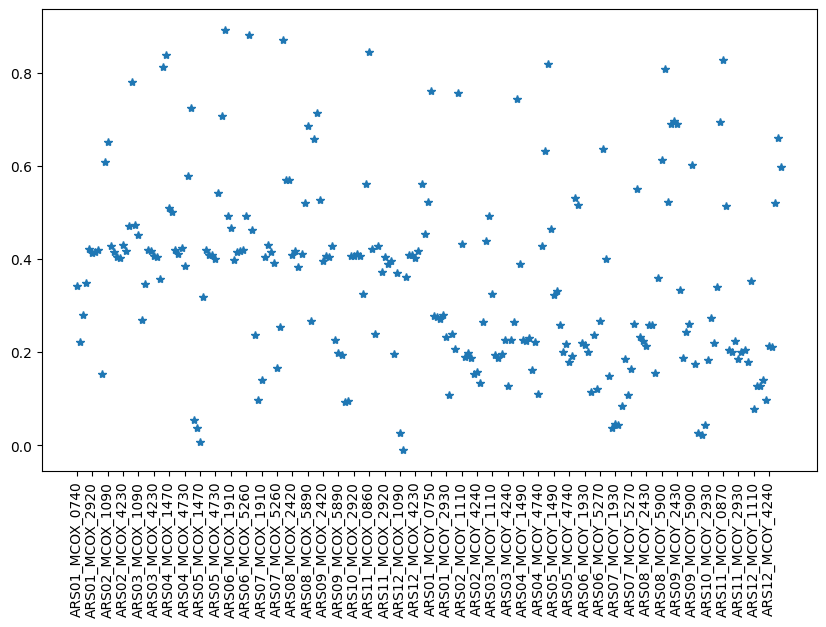

In [26]:

metric = RSquaredSeparated()
r2 = metric.call(output, inference).numpy()
r2 = pd.Series(data=r2, index=output_df.columns)
r2 = np.round(r2, decimals=5)
r2 = pd.DataFrame(r2).T
plt.figure(figsize=(10 ,6))
plt.plot(r2.iloc[0] ,'*')
plt.xticks(ticks=np.arange(0, len(r2[:].T) ,5) ,labels=r2.keys()[0::5], rotation=90)
plt.show()

In [61]:
inputcut =np.copy(input)
inputcut[:,20] = -5
inputcut[:,150] = -5

In [77]:
reconstruction, inference = model.predict(inputcut)
inference = scaling_reverse(inference, corr_min, corr_max, 0, 1)

316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step


In [78]:
np.mean(np.abs((reconstruction - input))) / np.mean(np.abs(input)) * 100
# 4.346784471623897 213649
#4.880156031905976 151249
#3.0691962373069237 160112

3.125419181734041

In [79]:
np.mean((inference - output) ** 2)

2.5625659515187053e-06

In [80]:

np.mean(np.abs((inference - output))) / np.mean(np.abs(output)) * 100
# 0.2084316709950323 213619
# 4.880156031905976 151245
#0.17508123929907707 160112

0.1733203285550816

In [ ]:
import itertools

collumns = list(range(130))
combinations =list(itertools.combinations(collumns, 5))
print(combinations)

In [30]:
reconstruction_error = []
reconstruction_error_max = []
inference_error = []
inference_error_max = []
tries = 2
max_broken = 50
pg = Progbar(max_broken*tries)
for i in range(max_broken):
    inference_error_loc = []
    inference_error_max_loc = []
    reconstruction_error_loc = []
    reconstruction_error_max_loc = []
    for j in range(tries):
        dropout_columns = np.random.choice(input.shape[1]//2, i, replace=False)
        dropout_colummns2 = dropout_columns+115
        dropout_columns = np.concatenate((dropout_columns,dropout_colummns2))
        inputcut = np.copy(input)
        inputcut[:,dropout_columns] = -5
        reconstruction, inference = model.predict(inputcut,verbose=0)
        inference = scaling_reverse(inference, corr_min, corr_max, 0, 1)
        inference_error_loc.append(np.mean(np.abs(inference - output)))
        inference_error_max_loc.append(np.max(np.abs(inference - output)))
        reconstruction_error_loc.append(np.mean(np.abs(reconstruction - input)))
        reconstruction_error_max_loc.append(np.max(np.abs(reconstruction - input)))
        pg.add(1)
    reconstruction_error.append(np.mean(reconstruction_error_loc))
    reconstruction_error_max.append(np.max(reconstruction_error_max_loc))
    inference_error.append(np.mean(inference_error_loc))
    inference_error_max.append(np.max(inference_error_max_loc))
    

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 375s 375ms/step


In [112]:
reconstruction_error = []
reconstruction_error_max = []
inference_error = []
inference_error_max = []
tries = 5
max_broken = 30
pg = Progbar(max_broken*tries)
for i in range(max_broken):
    inference_error_loc = []
    inference_error_max_loc = []
    reconstruction_error_loc = []
    reconstruction_error_max_loc = []
    for j in range(tries):
        dropout_column = np.random.randint(0,input.shape[1]//2-i-1, 1)
        dropout_columns = np.arange(dropout_column,dropout_column+i+1,1)
        #print(dropout_columns)
        dropout_colummns2 = dropout_columns+115
        dropout_columns = np.concatenate((dropout_columns,dropout_colummns2))
        inputcut = np.copy(input)
        inputcut[:,dropout_columns] = -5
        reconstruction, inference = model.predict(inputcut,verbose=0)
        inference = scaling_reverse(inference, corr_min, corr_max, 0, 1)
        inference_error_loc.append(np.mean(np.abs(inference - output)))
        inference_error_max_loc.append(np.max(np.abs(inference - output)))
        reconstruction_error_loc.append(np.mean(np.abs(reconstruction - input)))
        reconstruction_error_max_loc.append(np.max(np.abs(reconstruction - input)))
        pg.add(1)
    reconstruction_error.append(np.mean(reconstruction_error_loc))
    reconstruction_error_max.append(np.max(reconstruction_error_max_loc))
    inference_error.append(np.mean(inference_error_loc))
    inference_error_max.append(np.max(inference_error_max_loc))
    
    

/tmp/ipykernel_6095/4069784910.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dropout_columns = np.arange(dropout_column,dropout_column+i+1,1)


150/150 ━━━━━━━━━━━━━━━━━━━━ 56s 372ms/step


In [113]:
inference_error2 = np.array(inference_error)
reconstruction_error2 = np.array(reconstruction_error)

In [37]:
np.savez(path+'test_results.npz', reconstruction_error=reconstruction_error, inference_error=inference_error, inference_error_max=inference_error_max, reconstruction_error_max=reconstruction_error_max,tries = tries)

In [114]:
results = np.load(path+'test_results.npz')
reconstruction_error = results['reconstruction_error']
reconstruction_error_max = results['reconstruction_error_max']
inference_error_max = results['inference_error_max']
inference_error = results['inference_error']
print("Tries: ",results['tries'])
del results

Tries:  20


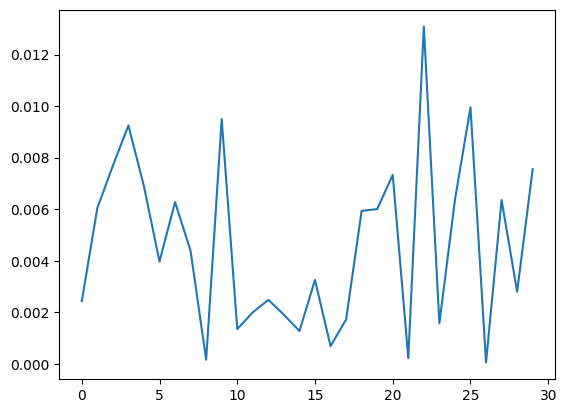

In [117]:
plt.figure()
plt.plot(np.abs(reconstruction_error[:30]-reconstruction_error2))

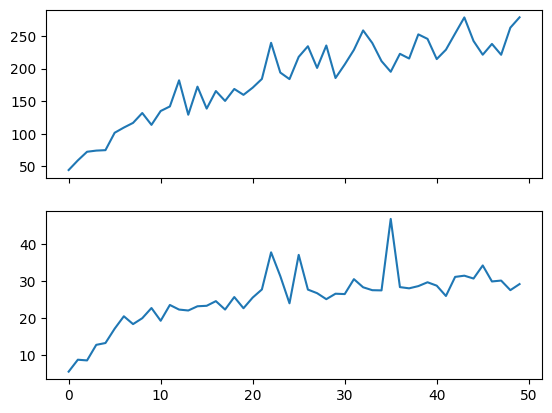

In [30]:
fig, axs = plt.subplots(2, 1,sharex= True)
axs[0].plot(((reconstruction_error_max) / np.mean(np.abs(input)))*100)
#[i.set_yscale('log') for i in axs]
axs[1].plot(((inference_error_max) / np.mean(np.abs(output)))*100)

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_6095/996602783.py:6: SyntaxWarning: invalid escape sequence '\D'
  axs[0].set(title='BPM Reconstruction',ylabel='$\Delta x ~[mm]$')
/tmp/ipykernel_6095/996602783.py:7: SyntaxWarning: invalid escape sequence '\D'
  axs[1].set(title='Corrector Strength Calculation',ylabel='$\Delta I ~[mA]$',xlabel="Number of BPMs Broken")


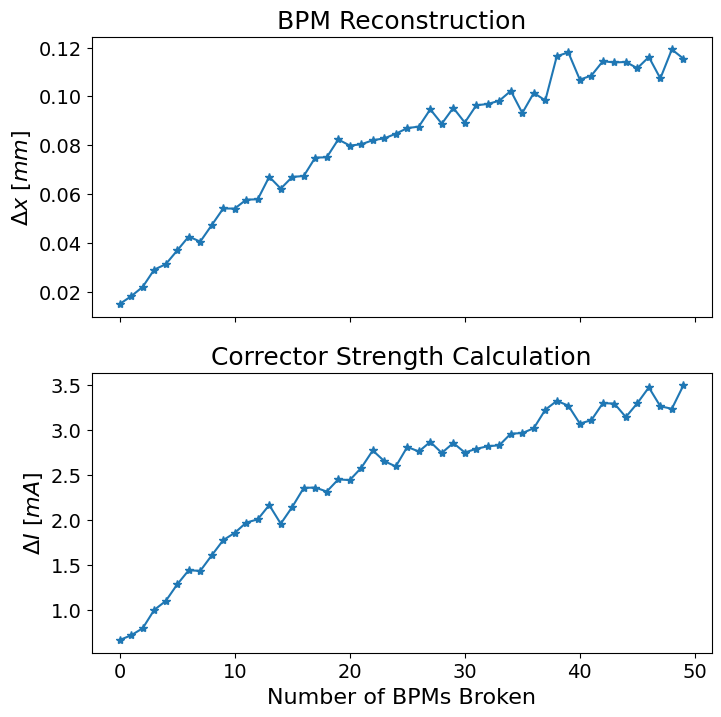

In [118]:
fig,axs = plt.subplots(2,1,figsize=(8,8),sharex=True)
#axs[0].plot(((reconstruction_error)/np.mean(np.abs(input)))*100)
axs[0].plot(reconstruction_error,marker="*")
#[i.set_yscale('log') for i in axs]
axs[1].plot(inference_error*1e3,marker="*")
axs[0].set(title='BPM Reconstruction',ylabel='$\Delta x ~[mm]$')
axs[1].set(title='Corrector Strength Calculation',ylabel='$\Delta I ~[mA]$',xlabel="Number of BPMs Broken")
for axi in axs:
    axi.xaxis.label.set_size(16)  # Set x-axis label size
    axi.yaxis.label.set_size(16)  # Set y-axis label size
    axi.title.set_size(18)
    axi.tick_params(axis='both', which='major', labelsize=14)
    #axi.set_xlim(0,30)
    #axi.set_ylim(0,3)

#
plt.savefig("BPMs Broken vs. MAE.pdf",dpi=600)

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_6095/1499879793.py:6: SyntaxWarning: invalid escape sequence '\D'
  axs[0].set(title='BPM Reconstruction',ylabel='$\Delta x ~[mm]$')
/tmp/ipykernel_6095/1499879793.py:7: SyntaxWarning: invalid escape sequence '\D'
  axs[1].set(title='Corrector Strength Calculation',ylabel='$\Delta I ~[mA]$',xlabel="Number of BPMs Broken")


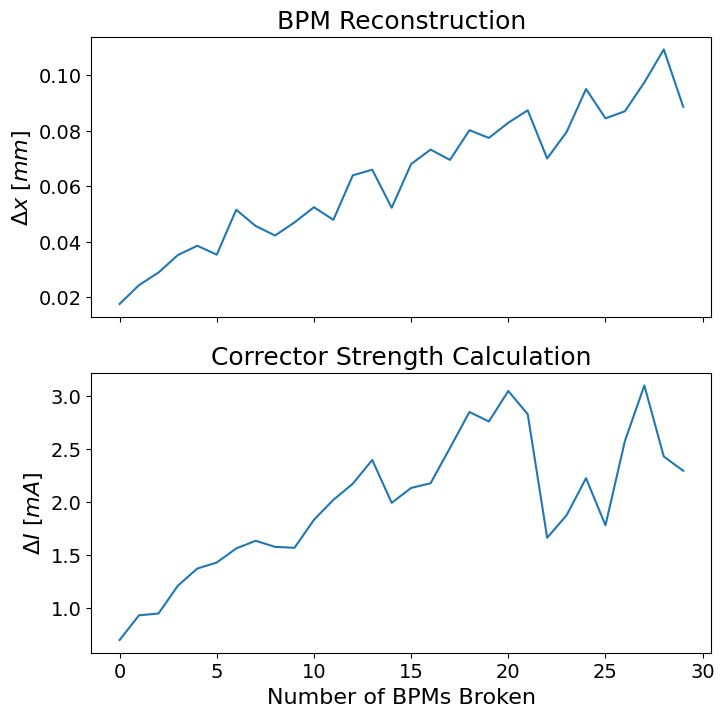

In [75]:
reconstruction_error2 fig,axs = plt.subplots(2,1,figsize=(8,8),sharex=True)
#axs[0].plot(((reconstruction_error)/np.mean(np.abs(input)))*100)
axs[0].plot(reconstruction_error)
#[i.set_yscale('log') for i in axs]
axs[1].plot(inference_error*1e3)
axs[0].set(title='BPM Reconstruction',ylabel='$\Delta x ~[mm]$')
axs[1].set(title='Corrector Strength Calculation',ylabel='$\Delta I ~[mA]$',xlabel="Number of BPMs Broken")
for axi in axs:
    axi.xaxis.label.set_size(16)  # Set x-axis label size
    axi.yaxis.label.set_size(16)  # Set y-axis label size
    axi.title.set_size(18)
    axi.tick_params(axis='both', which='major', labelsize=14)

#plt.savefig("BPMs Broken vs. MAE.pdf",dpi=600)

In [ ]:
metric = RSquaredSeparated()
r2 = metric.call(output, inference).numpy()
r2 = pd.Series(data=r2, index=output_df.columns)
r2 = np.round(r2, decimals=5)
r2 = pd.DataFrame(r2).T
plt.figure(figsize=(10 ,6))
plt.plot(r2.iloc[0] ,'*')
plt.xticks(ticks=np.arange(0, len(r2[:].T) ,5) ,labels=r2.keys()[0::5], rotation=90)
plt.show()

In [120]:
dropout_columns = np.random.choice(input.shape[1]//2, 5, replace=False)
#dropout_columns = np.arange(5,11,1)
#dropout_columns = np.linspace(0,114,5,dtype=np.int16)
print(dropout_columns)
dropout_colummns2 = dropout_columns+115
dropout_columns = np.concatenate((dropout_columns,dropout_colummns2))
inputcut = np.copy(input)
inputcut[:,dropout_columns] = -5
reconstruction_cut, inference_cut = model.predict(inputcut)
inference_cut = scaling_reverse(inference_cut,corr_min,corr_max,0,1)

reconstruction, inference = model.predict(input)
inference = scaling_reverse(inference,corr_min,corr_max,0,1)



[ 54  26   2  79 110]
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


In [104]:
(np.mean(np.abs(inference - output)) / np.mean(np.abs(output))) * 100 # autoencoder


0.16947492783613283

In [110]:
rec_error_cut = np.mean(np.abs(reconstruction_cut-input),axis=0)/np.mean(np.abs(input),axis=0)*100
rec_error = np.mean(np.abs(reconstruction-input),axis=0)/np.mean(np.abs(input),axis=0)*100
inf_error_cut = np.mean(np.abs(inference_cut-output),axis=0)/np.mean(np.abs(output),axis=0)*100
inf_error = np.mean(np.abs(inference-output),axis=0)/np.mean(np.abs(output),axis=0)*100

In [91]:
print(np.mean(np.abs(inference-output),axis=0))/np.mean(np.abs(output),axis=0)*100

[4.44988653e-04 1.00486459e-03 7.71464894e-04 2.74252727e-05
 2.36143577e-05 2.34159132e-05 2.34117629e-05 2.38407728e-05
 2.97665629e-04 1.46949689e-03 3.32008363e-03 2.32431567e-03
 7.14932928e-05 2.41693936e-05 2.36155921e-05 2.31519592e-05
 2.38231356e-05 4.86200500e-04 2.21779840e-03 9.33928769e-04
 1.06699956e-03 7.41034604e-04 2.67862502e-05 2.37124599e-05
 2.33364249e-05 2.35422700e-05 2.40958355e-05 3.16311238e-04
 1.24956307e-03 2.29538586e-03 1.76057659e-03 5.44853947e-05
 2.38369237e-05 2.34519634e-05 2.32157219e-05 2.45050151e-05
 5.49728492e-04 2.34318025e-03 5.78039238e-04 1.28499012e-03
 4.50996657e-04 2.03922637e-05 2.37384723e-05 2.35003147e-05
 2.35019701e-05 2.41923607e-05 1.71063407e-04 1.21914510e-03
 1.96326614e-03 2.17203012e-03 6.76240885e-05 2.43272770e-05
 2.34110844e-05 2.33853868e-05 2.37686019e-05 5.25865301e-04
 1.75187509e-03 1.50849670e-03 1.49856471e-03 1.12447703e-03
 3.77060178e-05 2.39990617e-05 2.30869230e-05 2.33985669e-05
 2.43581904e-05 5.939766

TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

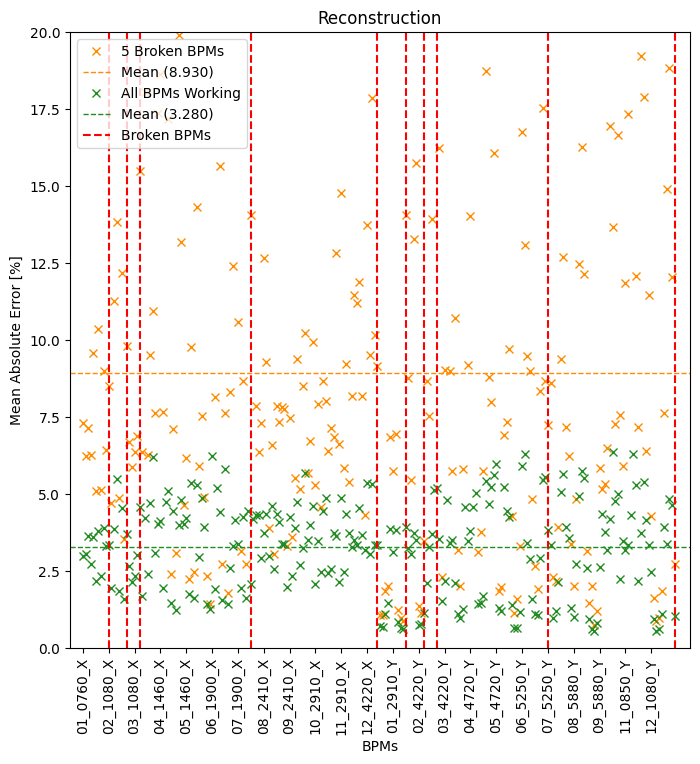

In [92]:
names = cleaned_strings = [s.replace("DBPM_", "").replace("ARS", "") for s in input_df.columns]
#print(names)

fig, axs = plt.subplots(1,1,figsize=(8,8))

axs.plot(rec_error_cut,"x",label='5 Broken BPMs',color="darkorange")
axs.hlines(np.mean(rec_error_cut),-5,235,label="Mean ({0:.3f})".format(np.mean(rec_error_cut)),color="darkorange",linestyles="dashed",linewidth=1)
axs.set_xticks(ticks=np.arange(0, 230 ,10) ,labels=names[0::10], rotation=90)
axs.plot(rec_error,"x",label='All BPMs Working',color="forestgreen")
axs.hlines(np.mean(rec_error),-5,235,label="Mean ({0:.3f})".format(np.mean(rec_error)),color="forestgreen",linestyles="dashed",linewidth=1)

axs.vlines(dropout_columns,0,20,colors="red",linestyles="dashed",label="Broken BPMs")
axs.set_ylim(0,20)
axs.set_xlim(-5,235)
axs.legend(loc="upper left")
axs.set(title="Reconstruction", xlabel="BPMs",ylabel="Mean Absolute Error [%]")
fig.savefig("single_shot5_rec.pdf",dpi=600)

In [125]:
print(names[114])
print(names[115])

01_0390_X
01_0760_Y


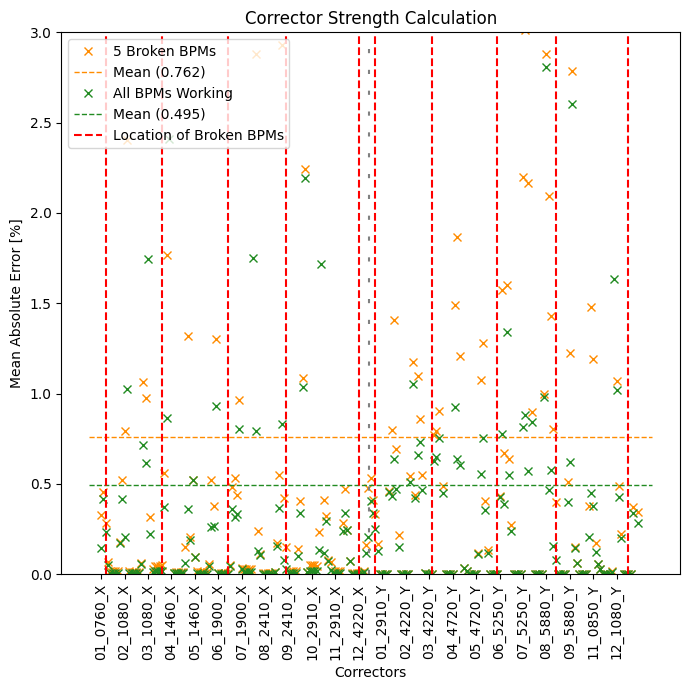

In [135]:
fig, axs = plt.subplots(1,1,figsize=(7,7),tight_layout=True)

axs.plot(inf_error_cut,"x",label='5 Broken BPMs',color="darkorange")
axs.hlines(np.mean(inf_error_cut),-5,235,label="Mean ({0:.3f})".format(np.mean(inf_error_cut)),color="darkorange",linestyles="dashed",linewidth=1)
axs.set_xticks(ticks=np.arange(0, 230 ,10) ,labels=names[0::10], rotation=90)
axs.set_ylim(0,3)
axs.plot(inf_error,"x",label='All BPMs Working',color="forestgreen")
axs.hlines(np.mean(inf_error),-5,235,label="Mean ({0:.3f})".format(np.mean(inf_error)),color="forestgreen",linestyles="dashed",linewidth=1)
axs.vlines(dropout_columns,0,10,colors="red",linestyles="dashed",label="Location of Broken BPMs")
axs.vlines(114.5,0,10,colors="gray",linestyles=(0, (2, 8)))
axs.set(title="Corrector Strength Calculation", xlabel="Correctors",ylabel="Mean Absolute Error [%]")
axs.legend(loc="upper left")

fig.savefig("single_shot5_inf_rand.pdf",dpi=600)

In [91]:
second_model = tf.keras.models.load_model("/home/guney/PycharmProjects/Summerproject/out/out/2024-06-25-212542/2/my_model_try.keras")
second_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 230)            │           920 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 230)            │        53,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 230)            │           920 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 230)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 230)            │        53,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,462 (2.46 MB)

 Trainable params: 107,180 (837.34 KB)

 Non-trainable params: 920 (7.19 KB)

 Optimizer params: 214,362 (1.64 MB)

In [113]:
rec,inf = model.predict(inputcut)
inf = scaling_reverse(inf,corr_min,corr_max,0,1)
input2 = np.copy(inputcut)
input2[:,dropout_columns] = rec[:,dropout_columns]
inf2 = second_model.predict(input2)
inf2 = scaling_reverse(inf2,corr_min,corr_max,0,1)


316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step


In [114]:
np.mean(np.abs((inf - output))) / np.mean(np.abs(output)) * 100 # autoencoder


0.29058710172956165

In [115]:
np.mean(np.abs((inf2 - output))) / np.mean(np.abs(output)) * 100 # autoencoder


0.3917046667537926